# Application of supervised learning

### Imports

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset


## 1. Presentation of the dataset

For this exercise, we chose the dataset "churn-prediction" from huggingface ([https://huggingface.co/datasets/scikit-learn/churn-prediction](https://huggingface.co/datasets/scikit-learn/churn-prediction)) This dataset contains 7043 profiles of a fictional telecomm company created by IBM with the goal to predict if a customer is going to withdraw from the company.
The dataset contains the following features :
- **customerID** : An id unique for each customer
- **gender** : The gender of the customer
- **SeniorCitizen** : Yes if the customer is a senior, No otherwise
- **Partner** : Yes if the customer has a partner, No otherwise
- **Dependents** : Yes if the customer has dependents (e.g. children), No otherwise
- **tenure** : How long the customer have been subscribed (in months)
- **PhoneService** : Yes if the customer is subscribed to the phone service, No otherwise
- **MultipleLines** : Yes if the customer is subscribed to the multiple lines service, No otherwise
- **InternetService** : Yes if the customer is subscribed to the internet service, No otherwise
- **OnlineSecurity** : Yes if the customer is subscribed to the online security service, No otherwise
-  **OnlineBackup** : Yes if the customer is subscribed to the online backup service, No otherwise
- **DeviceProtection** : Yes if the customer is subscribed to the device protection service, No otherwise
- **TechSupport** : Yes if the customer is subscribed to the tech support service, No otherwise
- **StreamingTV** : Yes if the customer is subscribed to the TV streaming service, No otherwise
- **StreamingMovies** : Yes if the customer is subscribed to the movie streaming service, No otherwise
- **Contract** : The type of contract the customer is subscribing to
- **PaperlessBilling** : Yes if the customer is using paperless billing , No otherwise
- **PaymentMethod** : The payment method of the customer
- **MonthlyCharges** : How much money ($) the customer pays every month
- **TotalCharges** : How much money ($) the customer paid since they started their subscription
- **Churn** : Yes if the customer withdrawn from the company within the last month , No otherwise

## 2. Problem definition

The problem we will solve with this dataset is to know if given it's informations, a customer is going to withdraw from the telecomm company within the next month. For that, we will use every informations given by the dataset.\
This is interesting in a business perspective because that would allow a telecomm company to know when a customer is going to leave their service and eventually take actions to push this customer to stay with the company.\
Because there is a lot of features, we will only use the ones linked to the usage of the company services :
- **tenure**
- **PhoneService**
- **MultipleLines**
- **InternetService**
- **OnlineSecurity**
- **OnlineBackup**
- **DeviceProtection**
- **TechSupport**
- **StreamingTV**
- **StreamingMovies**
- **Contract**
- **PaperlessBilling**
- **PaymentMethod**
- **MonthlyCharges**
- **TotalCharges**

## 3. Data loading and analysis

### Loading the dataset ([https://huggingface.co/datasets/scikit-learn/churn-prediction](https://huggingface.co/datasets/scikit-learn/churn-prediction))

In [58]:
# Loading dataset from Hugging Face
dataset = load_dataset('scikit-learn/churn-prediction', split='train')

In [132]:
data = pd.DataFrame(dataset)
data['TotalCharges'] = data.apply(lambda row: row['MonthlyCharges'] if row['TotalCharges'] == ' ' else row['TotalCharges'], axis=1)
data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})

We also made some little changes to the dataset, first when the client was subscribed to the company for 0 months, the total charges where an empty string we replaced it by the value of monthly charges. Also the churn was a "Yes" or "No" string which we replaced by a binary 1 or 0 respectively.

In [133]:
features = ['tenure', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
X = data[features]
y = data['Churn']

### Displaying the dataset

In [130]:
X

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5
7039,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9
7040,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6


### Analysis of the dataset

Shape of the dataset

In [70]:
X.shape

(7043, 15)

We will start by analyzing the descriptive statistics of the numerical features of the dataset, that includes :
- **tenure**
- **MonthlyCharges**
- **TotalCharges**

#### **tenure**

In [71]:
print(X["tenure"].describe())

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


This statistic tells us that the time (in months) for which the different users have been subscribing to the companies services are well distributed with an average of **32 months** and with most people in the range **[9, 55] months** of subscription. The longest subscription is **72 months**.

#### **MonthlyCharges**

In [72]:
print(X["MonthlyCharges"].describe())

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


This statistic tells us the most people are baying between **35 and 89$ a month** for the services of the company with an average of **70$ a month** and a maximum of **118$ a month**.

Now we are going to analyze the other statistics of the dataset which includes :
- **PhoneService**
- **MultipleLines**
- **InternetService**
- **OnlineSecurity**
- **OnlineBackup**
- **DeviceProtection**
- **TechSupport**
- **StreamingTV**
- **StreamingMovies**
- **Contract**
- **PaperlessBilling**
- **PaymentMethod**

First we will analyze the number of unique values for all of these features :

In [82]:
X.nunique()

tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
dtype: int64

Every feature that has **2** unique values are "Yes" or "No", the ones with **3** unique values are "Yes", "No" and "No internet service" which means that these features are dependent on whether the customer is subscribing to the internet service or not. Finally, the more notable features are :
- **MultipleLines** : "Yes", "No" or "No phone service"
- **InternetService** : "Fiber optic", "DSL" or "No"
- **Contract** : "Month-to-month", "One year" or "Two year"
- **PaymentMethod** : "Electronic check", "Mailed check", "Bank transfer (automatic)" or "Credit card (automatic)"

#### **PhoneService**

In [85]:
nb_phoneservice = data.groupby('PhoneService')["customerID"].nunique().sort_values(ascending=False)
print(nb_phoneservice)

PhoneService
Yes    6361
No      682
Name: customerID, dtype: int64


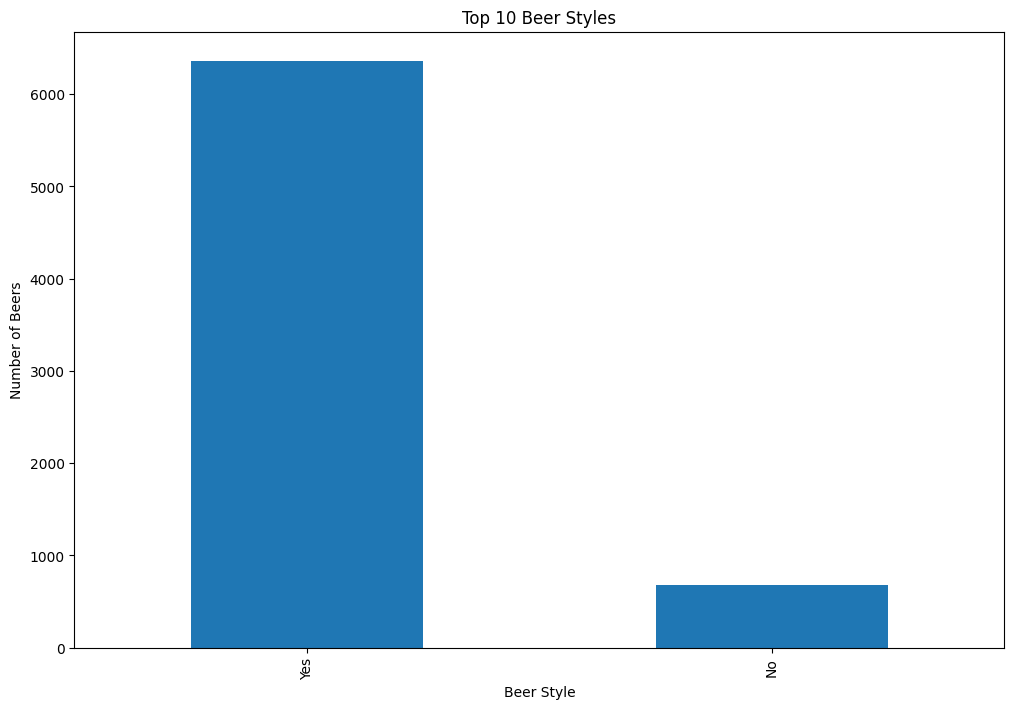

In [87]:
# Plot the number of customers subscribed to phone service
plt.figure(figsize=(12, 8))
nb_phoneservice.plot(kind='bar')
plt.title('Phone service subscriptions')
plt.xlabel('Subscription')
plt.ylabel('Number of customers')

plt.show()

This statistic shows us that most customers **(6361)** are subscribed to the phone service and only **682** aren't subscribed to this service.

#### **MultipleLines**

In [91]:
nb_multiplelines = data.groupby('MultipleLines')["customerID"].nunique().sort_values(ascending=False)
print(nb_multiplelines)

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: customerID, dtype: int64


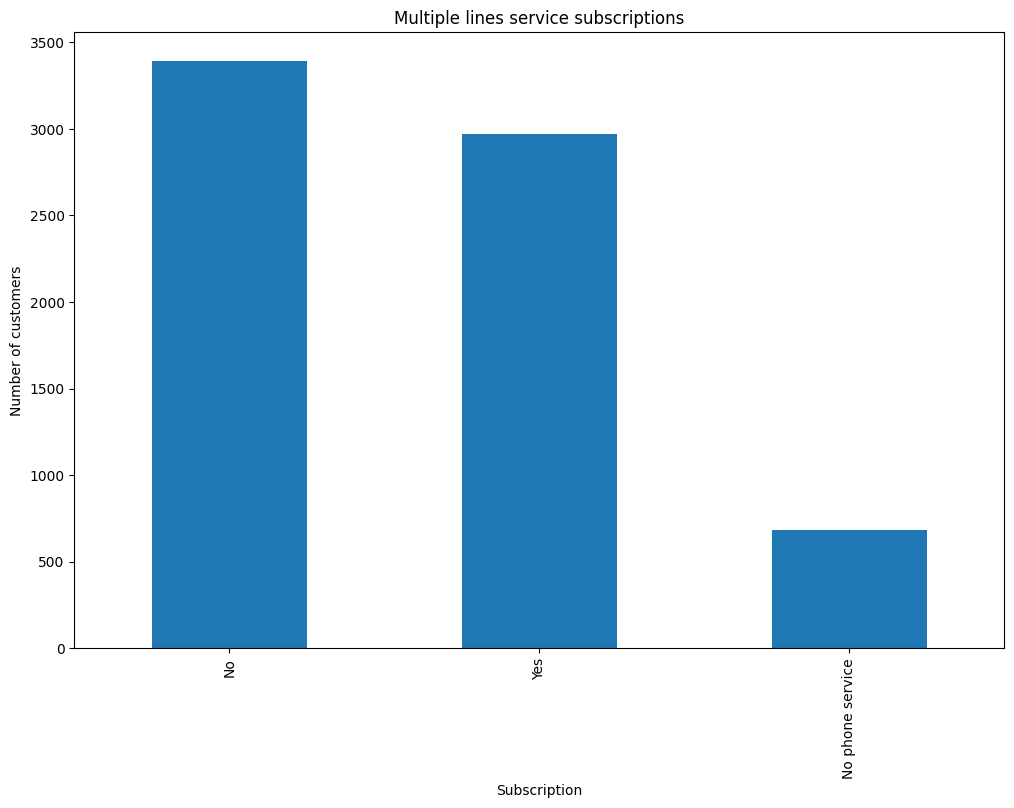

In [90]:
# Plot the number of customers subscribed to multiple lines service
plt.figure(figsize=(12, 8))
nb_multiplelines.plot(kind='bar')
plt.title('Multiple lines service subscriptions')
plt.xlabel('Subscription')
plt.ylabel('Number of customers')

plt.show()

This statistic shows us that the number of people subscribed to the multiple lines service **2971** is close to the number of people who aren't **3390**.

#### **InternetService**

In [94]:
nb_internetservice = data.groupby('InternetService')["customerID"].nunique().sort_values(ascending=False)
print(nb_internetservice)

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: customerID, dtype: int64


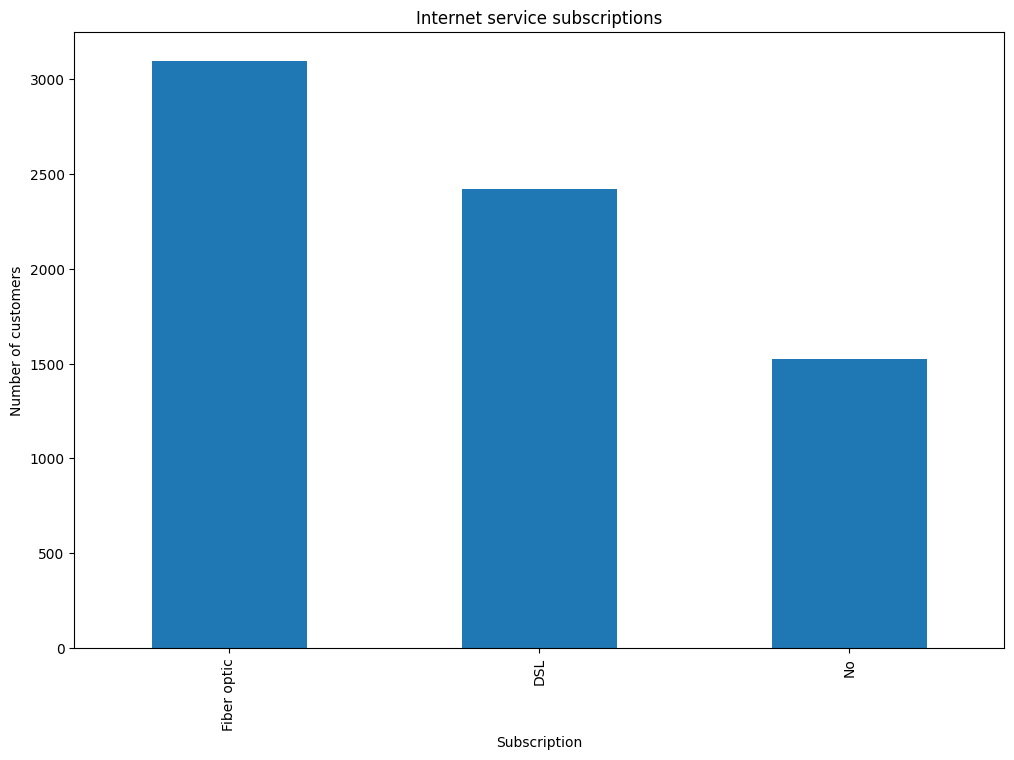

In [98]:
# Plot the number of customers subscribed to the internet service
plt.figure(figsize=(12, 8))
nb_internetservice.plot(kind='bar')
plt.title('Internet service subscriptions')
plt.xlabel('Subscription')
plt.ylabel('Number of customers')

plt.show()

This statistic shows us that most people **(3096)** are subscribed to the fiber optic, **2421** people are subscribed to the DSL and **1526** aren't subscribed to the internet service.

#### **OnlineSecurity**

In [99]:
nb_onlinesecurity = data.groupby('OnlineSecurity')["customerID"].nunique().sort_values(ascending=False)
print(nb_onlinesecurity)

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: customerID, dtype: int64


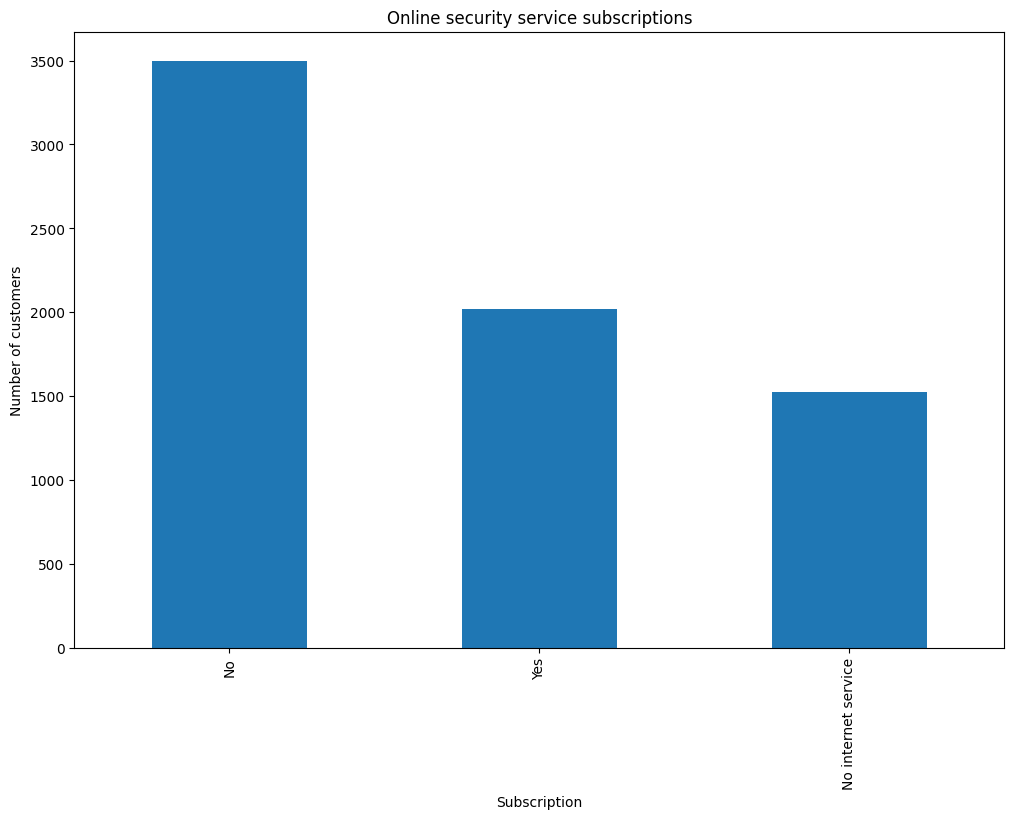

In [100]:
# Plot the number of customers subscribed to the online security service
plt.figure(figsize=(12, 8))
nb_onlinesecurity.plot(kind='bar')
plt.title('Online security service subscriptions')
plt.xlabel('Subscription')
plt.ylabel('Number of customers')

plt.show()

This statistic shows us that most people **(3498)** are not subscribed to the Online security service when **2019** people are subscribed to this service.

#### **OnlineBackup**

In [101]:
nb_onlinebackup = data.groupby('OnlineBackup')["customerID"].nunique().sort_values(ascending=False)
print(nb_onlinebackup)

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: customerID, dtype: int64


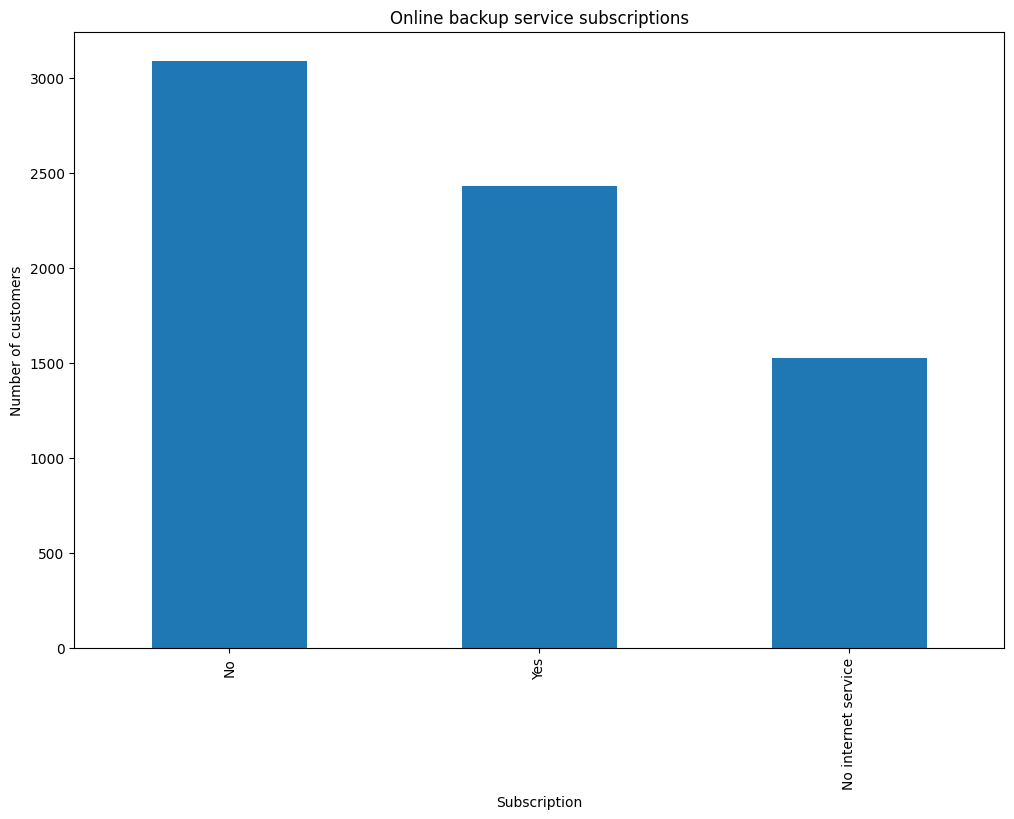

In [103]:
# Plot the number of customers subscribed to the online backup service
plt.figure(figsize=(12, 8))
nb_onlinebackup.plot(kind='bar')
plt.title('Online backup service subscriptions')
plt.xlabel('Subscription')
plt.ylabel('Number of customers')

plt.show()

This statistic shows us that most people **(3088)** are not subscribed to the online backup service when **2429** people are subscribed to this service.

#### **DeviceProtection**

In [104]:
nb_deviceprotection = data.groupby('DeviceProtection')["customerID"].nunique().sort_values(ascending=False)
print(nb_deviceprotection)

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: customerID, dtype: int64


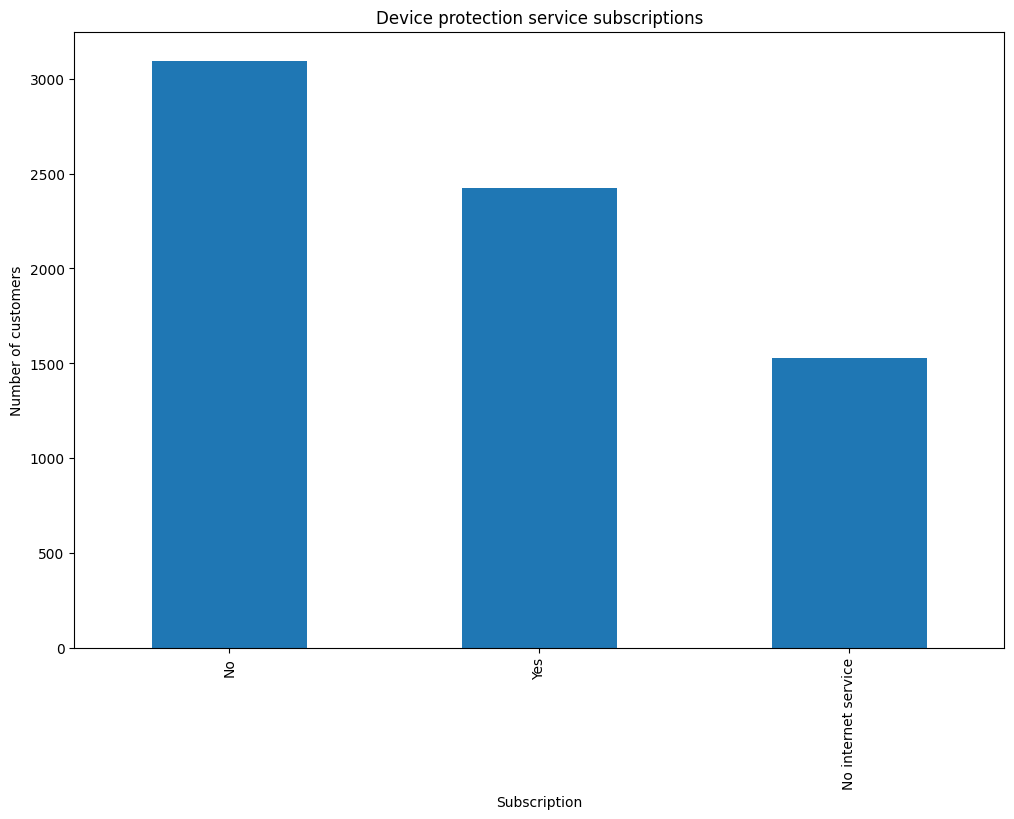

In [105]:
# Plot the number of customers subscribed to the device protection service
plt.figure(figsize=(12, 8))
nb_deviceprotection.plot(kind='bar')
plt.title('Device protection service subscriptions')
plt.xlabel('Subscription')
plt.ylabel('Number of customers')

plt.show()

This statistic shows us that most people **(3095)** are not subscribed to the device protection service when **2422** people are subscribed to this service.

#### **TechSupport**

In [109]:
nb_techsupport = data.groupby('TechSupport')["customerID"].nunique().sort_values(ascending=False)
print(nb_techsupport)

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: customerID, dtype: int64


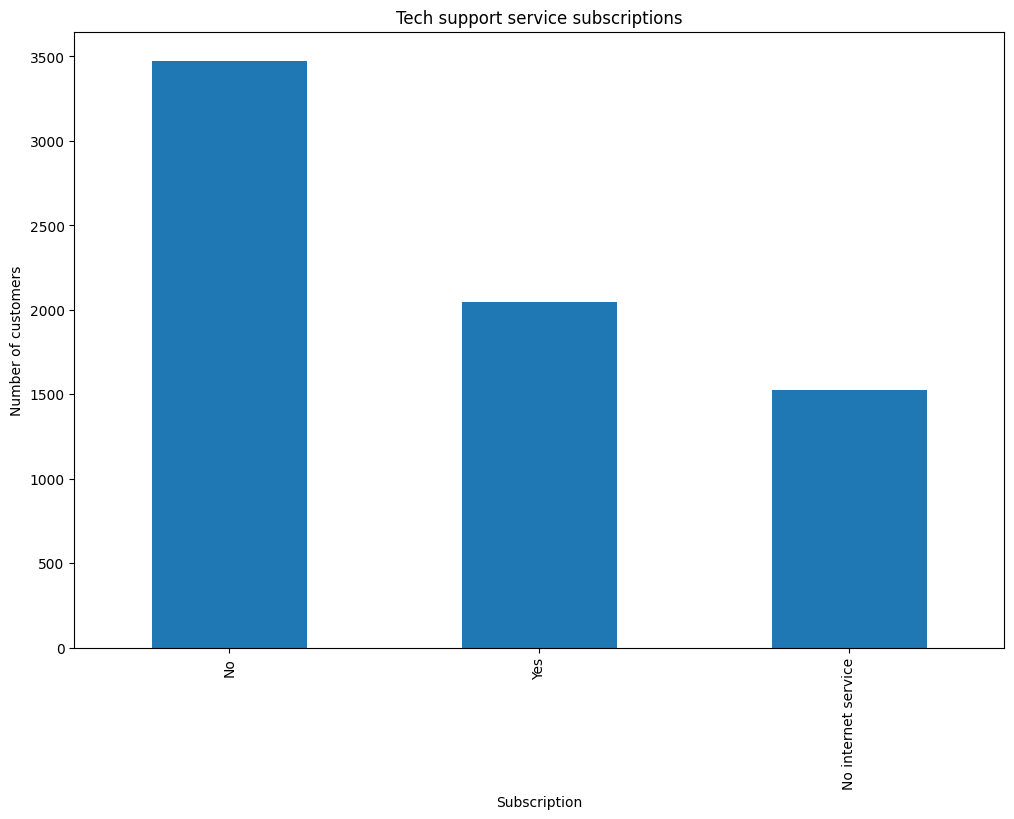

In [110]:
# Plot the number of customers subscribed to the tech support service
plt.figure(figsize=(12, 8))
nb_techsupport.plot(kind='bar')
plt.title('Tech support service subscriptions')
plt.xlabel('Subscription')
plt.ylabel('Number of customers')

plt.show()

This statistic shows us that most people **(3473)** are not subscribed to the tech support service when **2044** people are subscribed to this service.

#### **StreamingTV**

In [111]:
nb_streamingtv = data.groupby('StreamingTV')["customerID"].nunique().sort_values(ascending=False)
print(nb_streamingtv)

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: customerID, dtype: int64


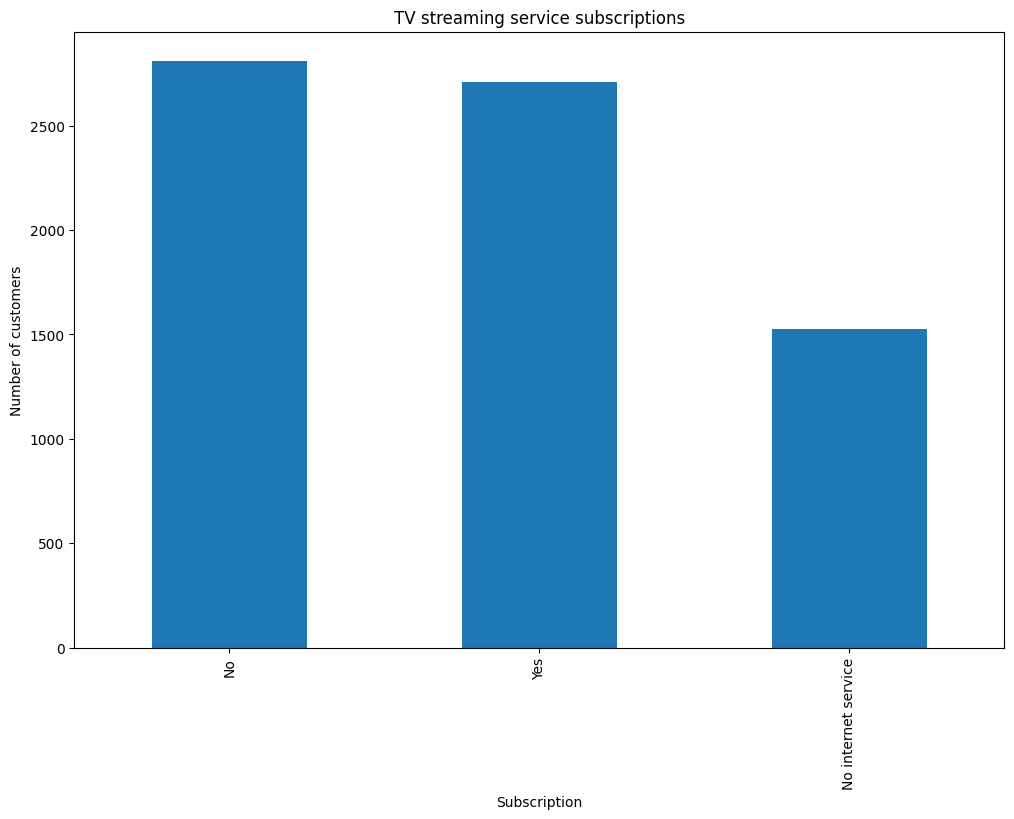

In [112]:
# Plot the number of customers subscribed to the tv streaming service
plt.figure(figsize=(12, 8))
nb_streamingtv.plot(kind='bar')
plt.title('TV streaming service subscriptions')
plt.xlabel('Subscription')
plt.ylabel('Number of customers')

plt.show()

This statistic shows us that **2810** are not subscribed to the TV streaming service which is close to the number of people are subscribed to this service **(2707)**.

#### **StreamingMovies**

In [116]:
nb_streamingmovies = data.groupby('StreamingMovies')["customerID"].nunique().sort_values(ascending=False)
print(nb_streamingmovies)

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: customerID, dtype: int64


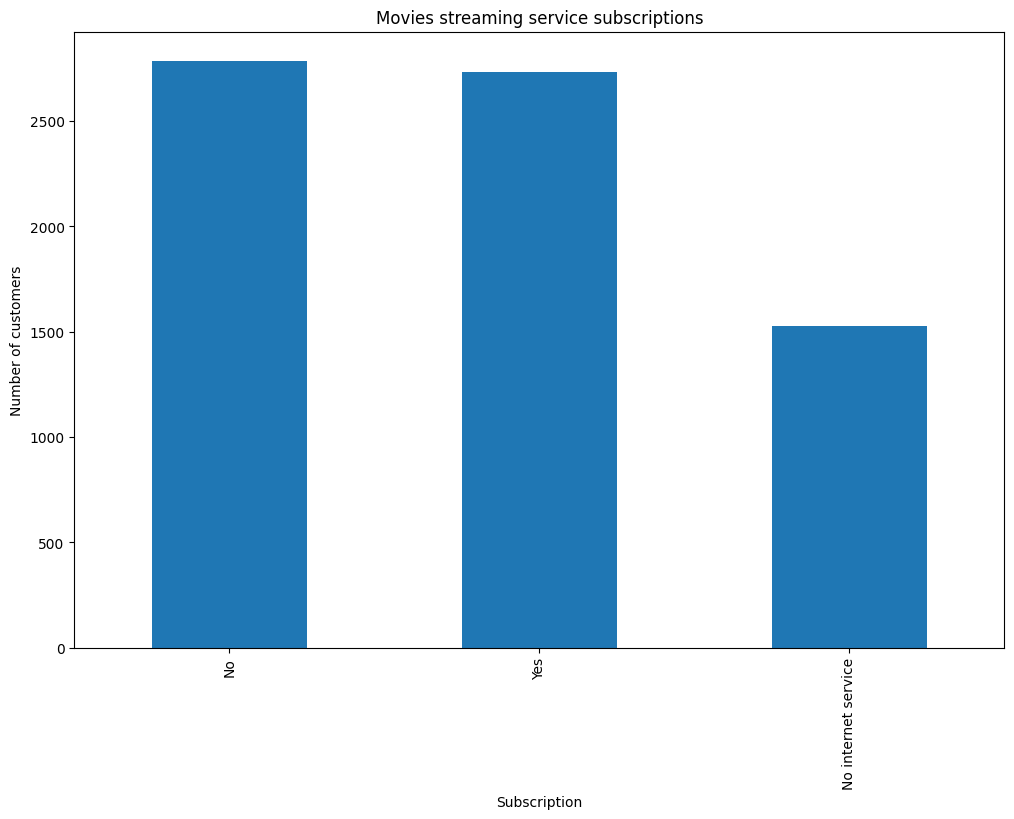

In [117]:
# Plot the number of customers subscribed to the movies streaming service
plt.figure(figsize=(12, 8))
nb_streamingmovies.plot(kind='bar')
plt.title('Movies streaming service subscriptions')
plt.xlabel('Subscription')
plt.ylabel('Number of customers')

plt.show()

This statistic shows us that **2785** are not subscribed to the movies streaming service which is close to the number of people are subscribed to this service **(2735)**.

#### **Contract**

In [118]:
nb_contract = data.groupby('Contract')["customerID"].nunique().sort_values(ascending=False)
print(nb_contract)

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: customerID, dtype: int64


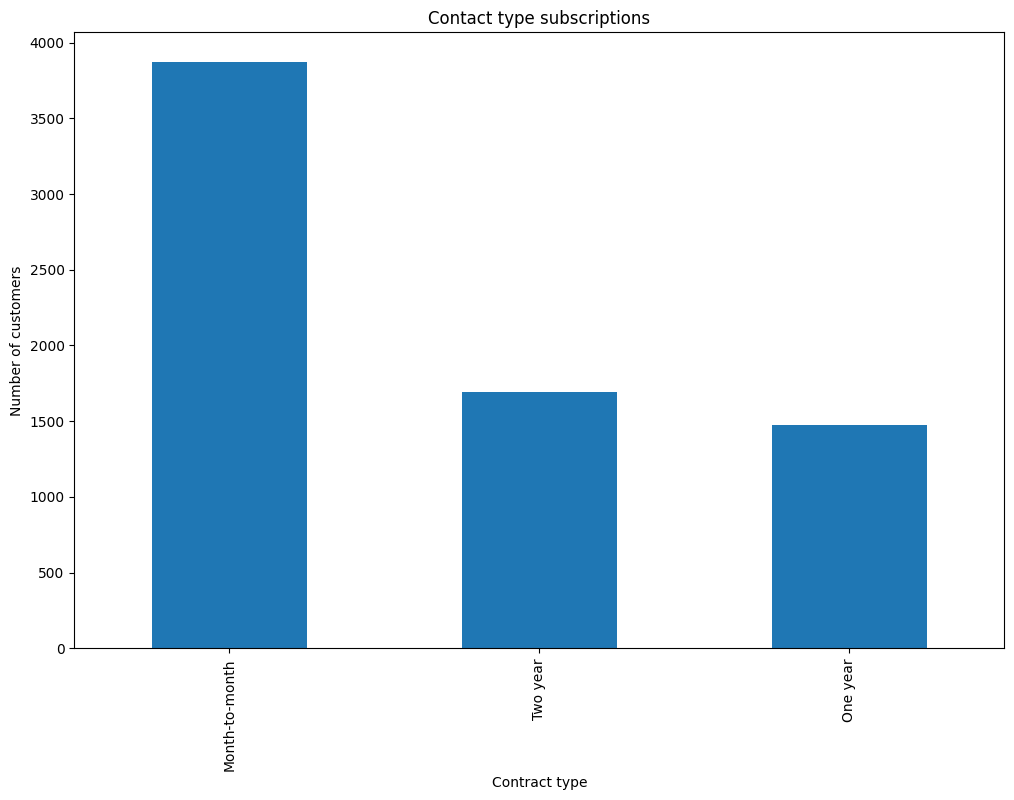

In [119]:
# Plot the number of customers subscribed to each type of contract
plt.figure(figsize=(12, 8))
nb_contract.plot(kind='bar')
plt.title('Contact type subscriptions')
plt.xlabel('Contract type')
plt.ylabel('Number of customers')

plt.show()

This statistic shows us that most people **(3875)** are subscribed with a month to month contract, **1695** to a two year contract and **1473** to a one year contract.

#### **PaperlessBilling**

In [120]:
nb_paperlessbilling = data.groupby('PaperlessBilling')["customerID"].nunique().sort_values(ascending=False)
print(nb_paperlessbilling)

PaperlessBilling
Yes    4171
No     2872
Name: customerID, dtype: int64


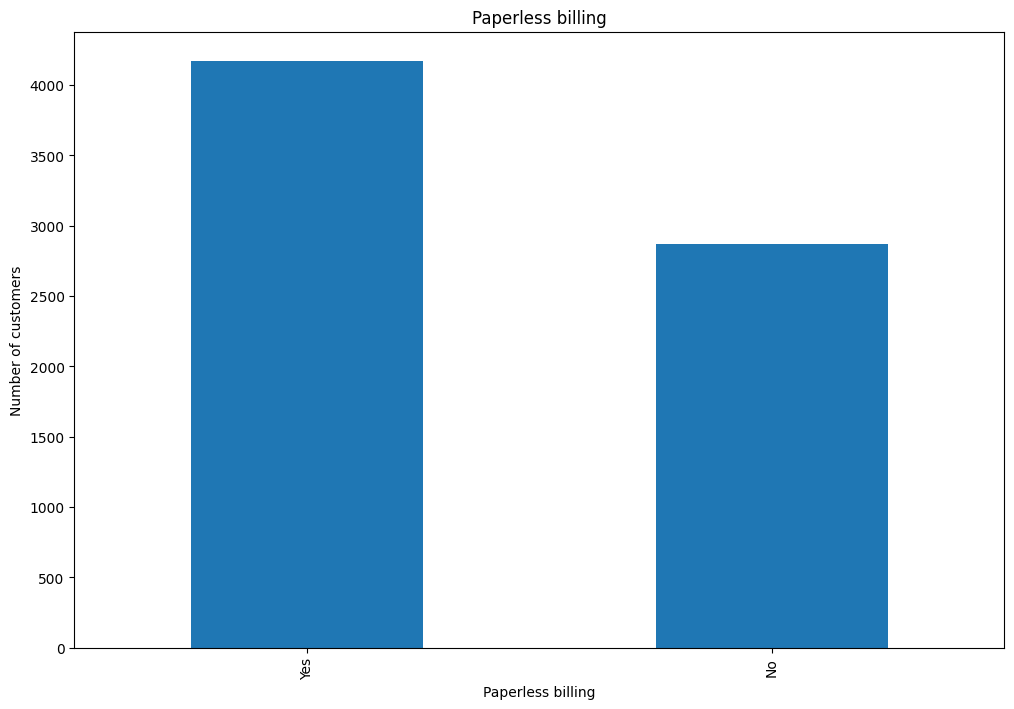

In [121]:
# Plot the number of customers paying using paperless billing
plt.figure(figsize=(12, 8))
nb_paperlessbilling.plot(kind='bar')
plt.title('Paperless billing')
plt.xlabel('Paperless billing')
plt.ylabel('Number of customers')

plt.show()

This statistic shows us that most people **(4171)** are using paperless billing and **2872** do not use this service.

#### **PaymentMethod**

In [122]:
nb_paymentmethod = data.groupby('PaymentMethod')["customerID"].nunique().sort_values(ascending=False)
print(nb_paymentmethod)

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: customerID, dtype: int64


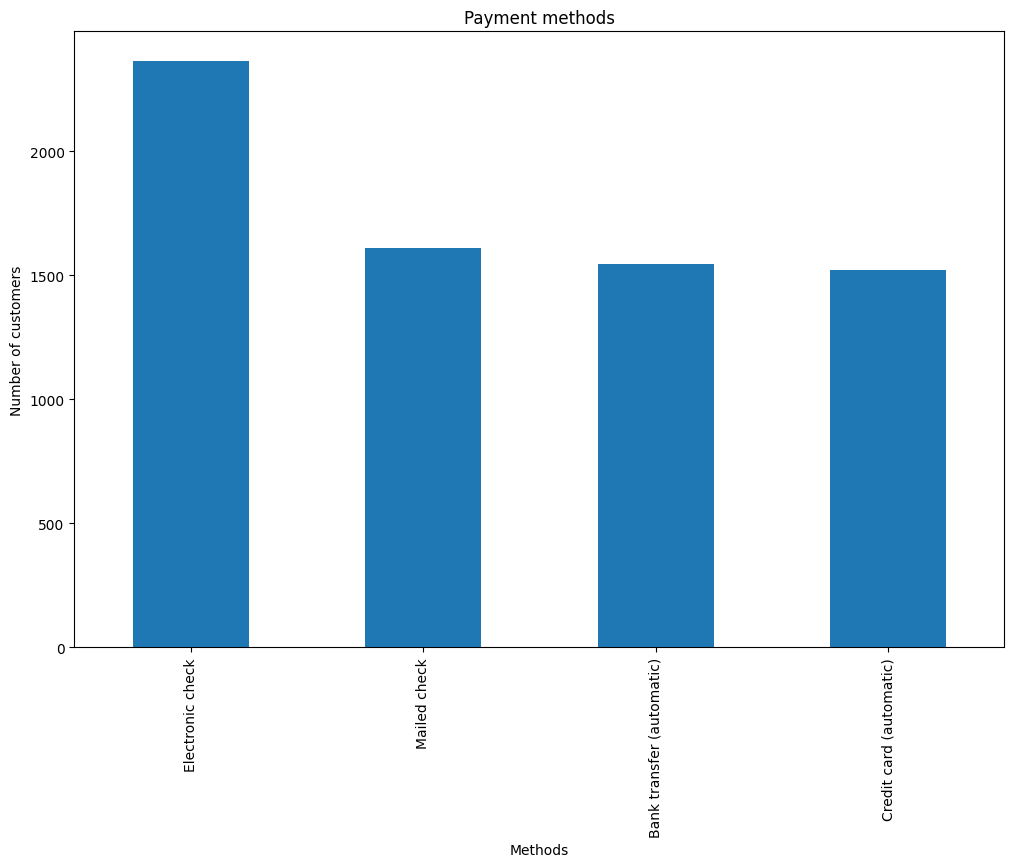

In [124]:
# Plot the number of customers for each payment method
plt.figure(figsize=(12, 8))
nb_paymentmethod.plot(kind='bar')
plt.title('Payment methods')
plt.xlabel('Methods')
plt.ylabel('Number of customers')

plt.show()

This statistic shows us that most people **(2365)** are using electronic checks, and the number of customers using Mailed checks, Bank transfers and Credit card is close, **1612**, **1544** and **1522** respectively.

### Correlation Matrix

Now we are going to analyze the correlation matrix for this dataset to find if some of the features are linked :

In [136]:
correlation_matrix = data[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]].corr()
print(correlation_matrix)

                  tenure  MonthlyCharges  TotalCharges     Churn
tenure          1.000000        0.247900      0.826164 -0.352229
MonthlyCharges  0.247900        1.000000      0.651182  0.193356
TotalCharges    0.826164        0.651182      1.000000 -0.198347
Churn          -0.352229        0.193356     -0.198347  1.000000


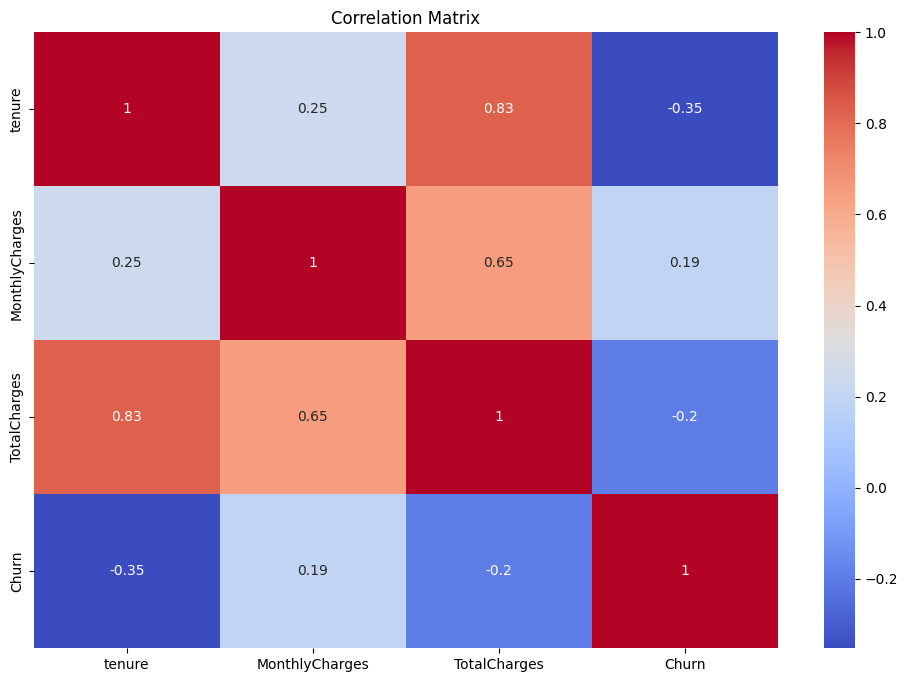

In [138]:
only_reviews_and_abv_name = ["tenure", "MonthlyCharges", "TotalCharges", "Churn"]
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=only_reviews_and_abv_name, yticklabels=only_reviews_and_abv_name)
plt.title('Correlation Matrix')
plt.show()

From these statistics, we can see that there is a high correlation between the total charges and the tenure **(0.83)** and monthly charges **(0.65)** which makes sense since the total charges is a mutiplication of the two other features, also there is a medium correlation between the tenure and the monthly charges **(0.25)** and between the monthly charges and the churn **(0.19)**. Finally, there is a low correlation between the churn and the total charges **(-0.2)** and tenure **(-0.35)**. So the monthly charges could be a deciding factor to know if a client is going to stay subscribed to the company or not.

## 4. Data preprocessig

The data preprocessing was done earlier, it consisted of :
 - When the client was subscribed to the company for 0 months, the total charges where an empty string we replaced it by the value of monthly charges.
 - The churn was a "Yes" or "No" string which we replaced by a binary 1 or 0 respectively. 

## 5. Evaluation

In [141]:
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(X), y, test_size=0.2, random_state=42)

In [146]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [150]:
# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [156]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [157]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.7806955287437899


We can see that the model has a pretty good accuracy, we'll see if this accuracy can be explained with the other metrics such as the confusion matrix and the clasification report.

Confusion Matrix:


<Axes: >

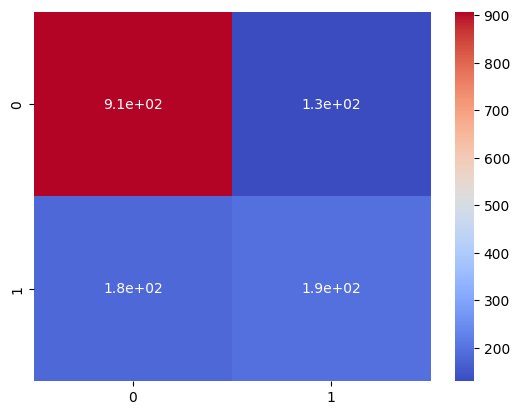

In [158]:
print("Confusion Matrix:")
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm')

The confusion matrix shows us that the logistic regression is really good at prediction if a client is not going to withdraw their subscription but is pretty bad at predicting if the client is going to withdraw. This can be explained with the dataset mostly being made of clients that are not withdrawing their subscriptions and therefore makes the logistic regression almost only guess that a client is not going to withdraw. This makes the **0.79** of accurracy that was previously really good a not so good result.

In [159]:
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1036
           1       0.60      0.52      0.56       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.70      1409
weighted avg       0.77      0.78      0.78      1409



The classification reports gives us more depth to the accuracy results by showing us that our predictor has an accuracy of **0.83** for predicting if a client is going to withdraw and **0.60** for clients that are not going to withdraw.

### Discussion of the results

Our logistic regression is good at predicting if a subscriber is going to keep using the company's services and less good at predicting if the customer is going to withdrdaw.\
These results can be explained by a dataset that is not uniform enough (much more customers that keep using the services than customers that are withdrawing). However i don't think the datas could be normalized enough to get proper results as the dataset is not large enough **(only 7043 entries)** and therefore the datas can probably not be normalized enough to get results that could be useful for a real company.\
We still solved the problem of "Can we predict if a customer is going to keep using a company's services using machine learning ?".